In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import sklearn
import numpy as np
import os

In [3]:
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#### Take X with user input

In [4]:
XR = int(input("Enter the number of rows for X:"))
XC = int(input("Enter the number of columns for X:"))

X = []
print("Enter the values for X: ")
for i in range(XR):
    a = []
    for j in range(XC):
        a.append(int(input()))
    X.append(a)

Enter the number of rows for X:10
Enter the number of columns for X:1
Enter the values for X: 
1
2
3
4
5
6
78
9
10
11


#### Take y with user input

In [5]:
YR = int(input("Enter the number of rows for y: "))
YC = int(input("Enter the number of columns for y: "))

y = []
print("Enter the values for y: ")
for i in range(YR):
    b = []
    for j in range(YC):
        b.append(int(input()))
    y.append(b)

Enter the number of rows for y: 10
Enter the number of columns for y: 1
Enter the values for y: 
2
3
4
5
6
7
8
9
10
11


In [16]:
# for testing
import numpy as np

#X = 2 * np.random.rand(200, 1)
#y = 4 + 3 * X + np.random.randn(200, 1)

#### Plot the graph

Saving figure generated_data_plot


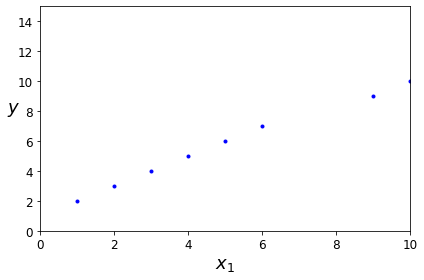

In [8]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 10, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [10]:
X_b = np.c_[np.ones((10, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
theta_best

array([[5.96528081],
       [0.0414511 ]])

In [12]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[5.96528081],
       [6.04818301]])

Saving figure linear_model_predictions_plot


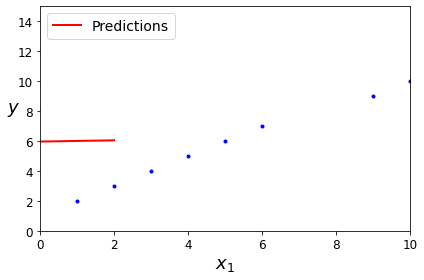

In [13]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([5.96528081]), array([[0.0414511]]))

In [15]:
lin_reg.predict(X_new)

array([[5.96528081],
       [6.04818301]])

In [16]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[5.96528081],
       [0.0414511 ]])

In [17]:
np.linalg.pinv(X_b).dot(y)

array([[5.96528081],
       [0.0414511 ]])

### KNN Classification